# Ford GoBike System Data Exploring
## by Reshabh Jain

This document explores a dataset containing information about a bicyle rental company, Ford GoBike and its system data.


In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import json
import zipfile
import os
import seaborn as sns
import calendar

%matplotlib inline

It's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in from 2017 to April, 2019.

Ford GoBike Data: https://s3.amazonaws.com/baywheels-data/index.html

I checked in the website and it looks like there is data from 2017 until the April of 2019. Later this data is called "BayWheels" so I will not use this data for this analysis and I will only use the data from 2017 until April 2019.

In [2]:
# Create list of years and month in 2018 and 2019
list_years = list(range(201801,201813)) + list(range(201901,201905))
list_years

[201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904]

In [3]:
# Create list of urls to download the data
list_urls = []

# Add the first URL that contains the data of all 2017
list_urls.append("https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip")

# Add the url for each combination of year and month from 2018 and 2019
for year in list_years:
    list_urls.append("https://s3.amazonaws.com/baywheels-data/{}-fordgobike-tripdata.csv.zip".format(year))
    
# Show the first of the list_urls
list_urls

['https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201812-fordg

In [4]:
# Create a function to download, extract and read the data
def get_data(url):
    
    # Import the data programmatically using 'requests'
    r = requests.get(url)
    
    # Create empty dataframe
    df = pd.DataFrame()
    
    # Name of the zip file
    name_zip_file = url.split('/')[-1]
    
    # Name of the CSV file
    name_file = name_zip_file.split('.')[0] + ".csv"
    
    # Save the data in the current directory
    with open (name_zip_file, 'wb') as file:
        
        # Save the ZIP file
        file.write(r.content)
        
        # Unzip the zip file
        zf = zipfile.ZipFile(name_zip_file) 
        
        # Read the CSV file and save the result in a dataframe
        df = pd.read_csv(zf.open(name_file))
        
        # Before returning the data I will remove the column "bike_share_for_all_trip" if it exist
        if 'bike_share_for_all_trip' in df.columns:
            df.drop('bike_share_for_all_trip', axis = 1, inplace = True)
            
    # Return the dataframe
    return(df)

In [5]:
# Create a empty dataframe
bike_data = pd.DataFrame()

for url in list_urls:
    # Add the data to the main dataframe called "bike_data"
    bike_data = bike_data.append(get_data(url))

# Save all the data (backup) in a CSV file
bike_data.to_csv('bike_data.csv', encoding = 'utf-8', index=False)
    
#Checking and verifying if the data is correctly imported
bike_data.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0              74.0                              Laguna St at Hayes St   
1             284.0  Yerba Buena Center for the Arts (Howard St at ...   
2             245.0                             Downtown Berkeley BART   
3              60.0                               8th St at Ringold St   
4             239.0                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244            43.0   
1               37.784872              -122.400876            96.0   
2               37.870348              -122.267764           245.0   
3               37.774520              -122.409449             5.0   
4               37.868813              -122.258764           247.0   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  
0            -122.415929       96    Customer  
1            -122.426614       88    Customer  
2            -122.267764     1094    Customer  
3            -122.408445     2831    Customer  
4            -122.265896     3167  Subscriber

In [6]:
# Show the information of "bike_data"
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254325 entries, 0 to 239110
Data columns (total 13 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
dtypes: float64(6), int64(2), object(5)
memory usage: 347.6+ MB


In [7]:
# Show the basic statistics
bike_data.describe()

duration_sec  start_station_id  start_station_latitude  \
count  3.254325e+06      3.241824e+06            3.254325e+06   
mean   8.743223e+02      1.209191e+02            3.776880e+01   
std    2.468547e+03      1.030184e+02            1.029275e-01   
min    6.100000e+01      3.000000e+00            0.000000e+00   
25%    3.510000e+02      3.100000e+01            3.777106e+01   
50%    5.570000e+02      8.800000e+01            3.778107e+01   
75%    8.730000e+02      1.880000e+02            3.779539e+01   
max    8.636900e+04      4.200000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             3.254325e+06    3.241824e+06          3.254325e+06   
mean             -1.223530e+02    1.191966e+02          3.776874e+01   
std               1.601559e-01    1.029334e+02          1.342571e-01   
min              -1.224737e+02    3.000000e+00          0.000000e+00   
25%              -1.224117e+02    3.000000e+01          3.777143e+01   
50%              -1.223983e+02    8.700000e+01          3.778127e+01   
75%              -1.222934e+02    1.860000e+02          3.779625e+01   
max               0.000000e+00    4.200000e+02          4.551000e+01   

       end_station_longitude       bike_id  
count           3.254325e+06  3.254325e+06  
mean           -1.223519e+02  2.729018e+03  
std             3.220803e-01  1.724443e+03  
min            -1.224737e+02  1.000000e+01  
25%            -1.224108e+02  1.336000e+03  
50%            -1.223974e+02  2.579000e+03  
75%            -1.222935e+02  3.821000e+03  
max             0.000000e+00  7.108000e+03

### What is the structure of your dataset?

In the dataframe bike_data there are in total 3,254,325 entries and 13 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id,user_type).

Most of the variables are numeric except for the id's, stations names and type of user.


### What is/are the main feature(s) of interest in your dataset?

In this inverstigation, I want to look at the differen characteristics of type of users and how the company can increase the amount of subscribers. I would like to know if there is some station in where the amount of the type of user Customer is using this service more than the type of user Subscriber. This can be seen as an oportunity to promote this service more in the area of this stations in where the company can increase the amount of subscribers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In this case I think the time and station id start and finish they will help me to find the solution for the previous question. It also could help the GPS location of each station to see if there is some parts of the cities in where we can increase the ads to gain more Subscribers.

In [9]:
# checking if there is any duplicated data entry
sum(bike_data.duplicated())

0

In [10]:
# Using bike_data.shape to get get a high level understanding of the number of entries.
bike_data.shape

(3254325, 13)

In [11]:
# Finding how many bikes there are in this dataset
bike_data.bike_id.nunique()

6930

In [8]:
# Before cleaning create a copy of the original data
df = bike_data.copy()

To remove the rows in which station id is not given

In [12]:
# Check the number of rows in where the stations ID are na
sum(bike_data.start_station_id.isna()), sum(bike_data.end_station_id.isna())

(12501, 12501)

In [13]:
# Remove the rows withou station id
bike_data = bike_data[~bike_data.start_station_id.isna()]
bike_data = bike_data[~bike_data.end_station_id.isna()]

In [14]:
# Change datatypes of dates
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

# Change the datatypes of the ids from int to string
bike_data['start_station_id'] = bike_data['start_station_id'].astype(int).astype(str)
bike_data['end_station_id'] = bike_data['end_station_id'].astype(int).astype(str)
bike_data['bike_id'] = bike_data['bike_id'].astype(str)

# Calculate the duration in hours
bike_data['duration_hour'] = bike_data['duration_sec']/3600

# Get the day, month, year, hour from the start and end time
bike_data['start_year'] = bike_data['start_time'].apply(lambda x: x.year)
bike_data['start_month'] = bike_data['start_time'].apply(lambda x: x.month)
bike_data['start_day'] = bike_data['start_time'].apply(lambda x: x.day)
bike_data['start_hour'] = bike_data['start_time'].apply(lambda x: x.hour)
bike_data['end_year'] = bike_data['end_time'].apply(lambda x: x.year)
bike_data['end_month'] = bike_data['end_time'].apply(lambda x: x.month)
bike_data['end_day'] = bike_data['end_time'].apply(lambda x: x.day)
bike_data['end_hour'] = bike_data['end_time'].apply(lambda x: x.hour)

In [15]:
# Function to get the month name from the month number
def get_month_name(month):
    list_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return(list_months[month-1])

# Create new column with the name of the month
bike_data['start_month_name'] = bike_data['start_month'].apply(lambda month: get_month_name(month))
bike_data['end_month_name'] = bike_data['end_month'].apply(lambda month: get_month_name(month))

In [16]:
# Show the header of "bike_data"
bike_data.head()

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1         78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2         45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3         62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4         43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   

  start_station_id                                 start_station_name  \
0               74                              Laguna St at Hayes St   
1              284  Yerba Buena Center for the Arts (Howard St at ...   
2              245                             Downtown Berkeley BART   
3               60                               8th St at Ringold St   
4              239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.776435              -122.426244             43   
1               37.784872              -122.400876             96   
2               37.870348              -122.267764            245   
3               37.774520              -122.409449              5   
4               37.868813              -122.258764            247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   ...  start_year start_month start_day  start_hour  end_year  end_month  \
0  ...        2017          12        31          16      2018          1   
1  ...        2017          12        31          15      2018          1   
2  ...        2017          12        31          22      2018          1   
3  ...        2017          12        31          17      2018          1   
4  ...        2017          12        31          14      2018          1   

   end_day  end_hour  start_month_name  end_month_name  
0        1        15               Dec             Jan  
1        1        13               Dec             Jan  
2        1        11               Dec             Jan  
3        1        10               Dec             Jan  
4        1         2               Dec             Jan  

[5 rows x 24 columns]

In [17]:
# Show the information of "bike_data" after changing some data types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241824 entries, 0 to 239110
Data columns (total 24 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
duration_hour              float64
start_year                 int64
start_month                int64
start_day                  int64
start_hour                 int64
end_year                   int64
end_month                  int64
end_day                    int64
end_hour                   int64
start_month_name           object
end_month_name             object
dtypes: datetime64[ns](2), float64(5), int64(9), object(8)
m

## Univariate Exploration


### Average bike trips vs seconds

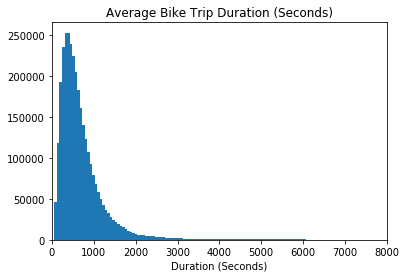

In [19]:
#Plotting of the average trip duration as a main variable.

bin_edges = np.arange(0, bike_data['duration_sec'].max() + 100 , 60)
plt.hist(data = bike_data , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

so there are more than 250000 bike trip held for an average 600 seconds. For much better understanding of graph we will also check the bike trips with respect to minutes.

### Average bike trips vs minutes

In [21]:
# Converting the seconds into minutes for better understanding of the graph.
bike_data['duration_min'] = bike_data['duration_sec'] / 60

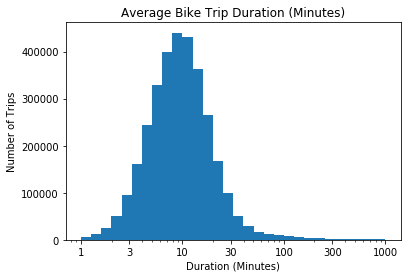

In [22]:
#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = bike_data , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

The average bike lasts between 1 and just over 100 minutes with the majority of bike trips lasting just under 10 minutes.

## Subscriber vs Customer counts

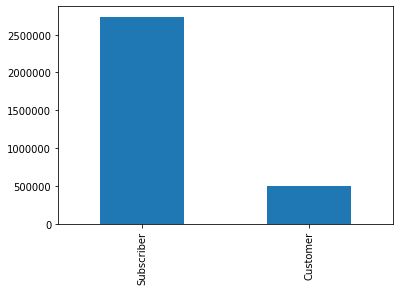

In [23]:
# Check the amount of different types of users
bike_data.user_type.value_counts().plot(kind='bar');

According to this graph it is clearly visible that there are nearly 7 times more Subscriber than Customer.

### Monthly bike ride counts

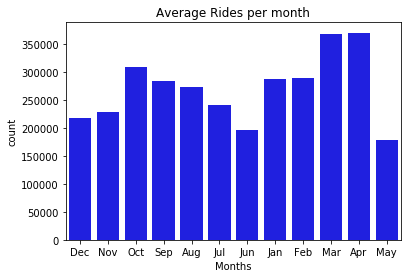

In [29]:
# This slide indicates the data points in a month-wise fashion
sns.countplot(data=bike_data,x='start_month_name', color='b')
plt.title('Average Rides per month');
plt.xlabel('Months');

We can easily see that the maximum number of rides were done in April.

### Top 10 most popular stations

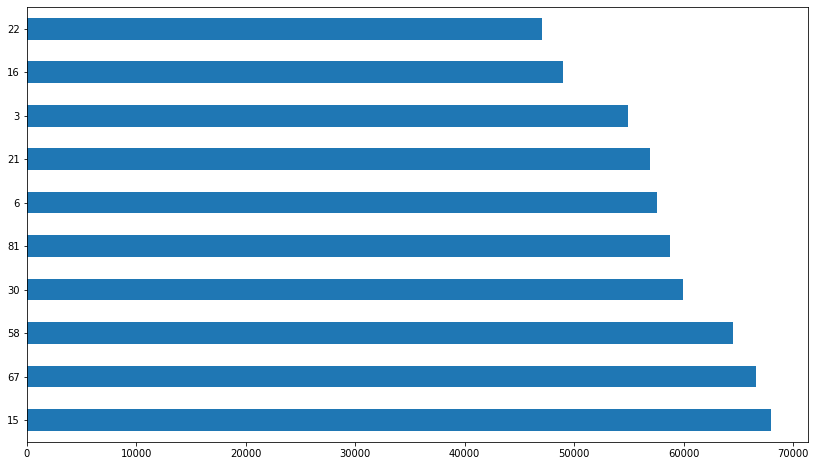

In [34]:
# Bar plot with the top 10 most popular start stations
bike_data.start_station_id.value_counts().head(10).plot(kind='barh', figsize=(14,8));

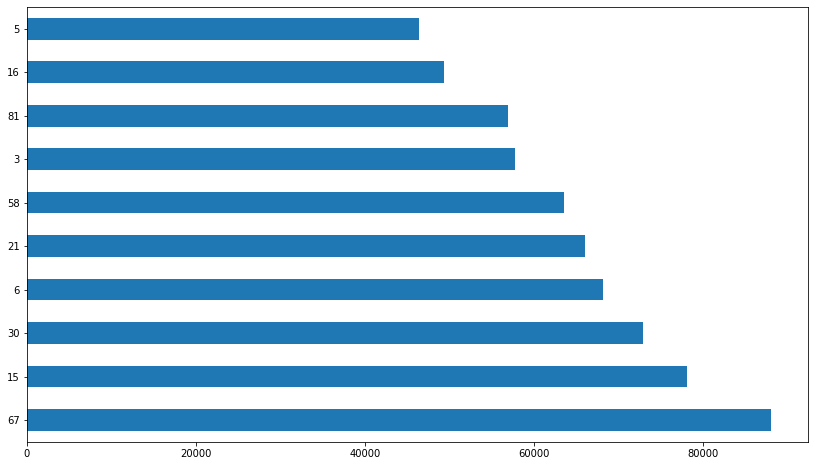

In [35]:
# Bar plot with the top 10 most popular end stations
bike_data.end_station_id.value_counts().head(10).plot(kind='barh', figsize=(14,8));

In the two previous plots we can see that stations like the 15 and the 67 are really popular and the amount of starts and ends is really high. Also we see the amount of trips finishing in the station 67 is more high than the amount of bikes that they start at this location, this means that if the company doesn't remove the bikes it will be an over capacity in this station.

In [32]:
# Number of unique stations
bike_data.start_station_id.nunique(), bike_data.end_station_id.nunique()

(372, 372)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We can clearly see that some stations are more frequent than other, in total there are 372 different stations. 

Another thing we can say is that most of the users are Subscriber.

In the case of the transfromations, I already did the transormations in the step before in the cleaning part.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

First, I removed the rows that didn't contain the station id, because this feature is on of the main interest.

Then I changed the data types of the columns:
- start_time and end_time to a datetime format.
- start_station_id, end_station_id and bike_id from float to a string

And I also have calculated the amount of hours from the column duration_sec, I think it will be much easy to understand in hours.

Also, I have created a new column with the month name for the start and end month.

Finally, I have extracted the year, month, day and hour from the start and end date.


## Bivariate Exploration

Now we will investigate the relationship between average bike ride time and months of the year.

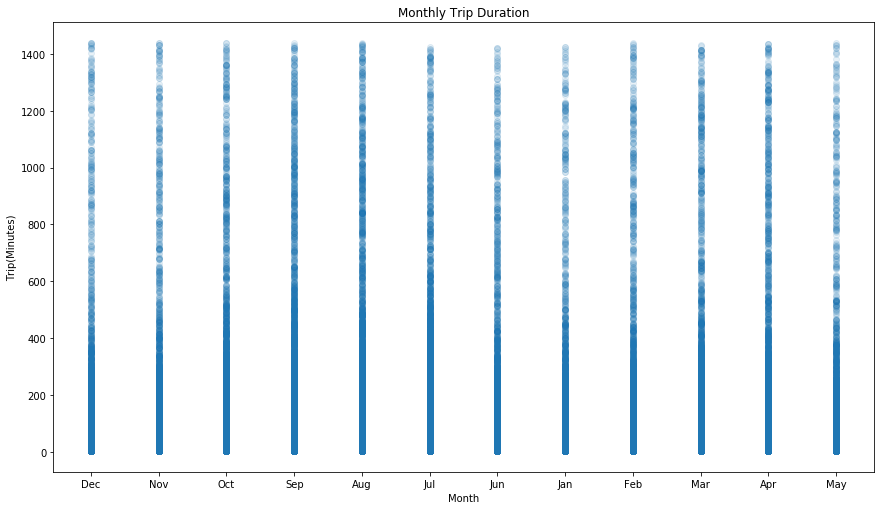

In [38]:
# Now check the bike ride duration for each month
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = bike_data , x = 'start_month_name' , y = 'duration_min' , alpha = 0.1 )
plt.title('Monthly Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip(Minutes)');

There was a surprisingly consistent minimum of bike trips throughout the year, always just below 200 minutes. We saw longer trips in April and August while May had fewer trips that lasted as long.

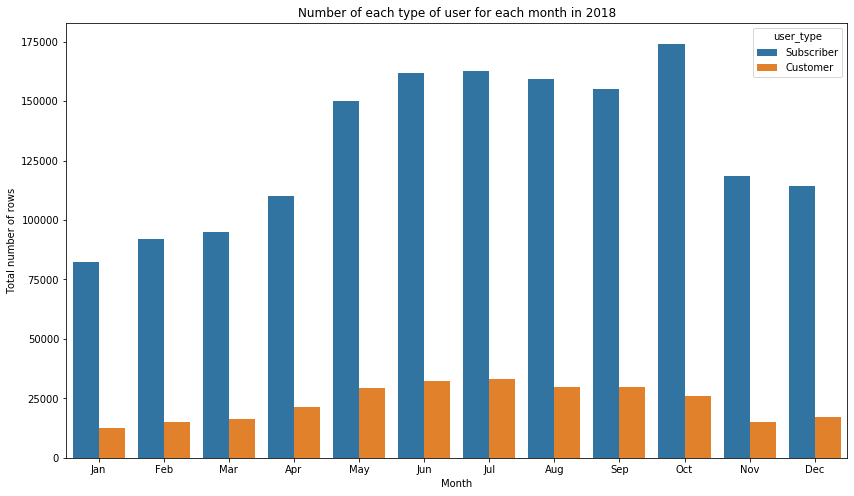

In [39]:
# Plot a countplot using the library Seaborn
plt.figure(figsize=(14,8));
sns.countplot(data = bike_data.query('start_year == 2018'), x = 'start_month_name', hue = 'user_type');
plt.xlabel('Month');
plt.ylabel('Total number of rows');
plt.title('Number of each type of user for each month in 2018');
plt.show()

In the previous plot we can see the amount of customers and subscribers increase during the summer and then it decrease on the winter.

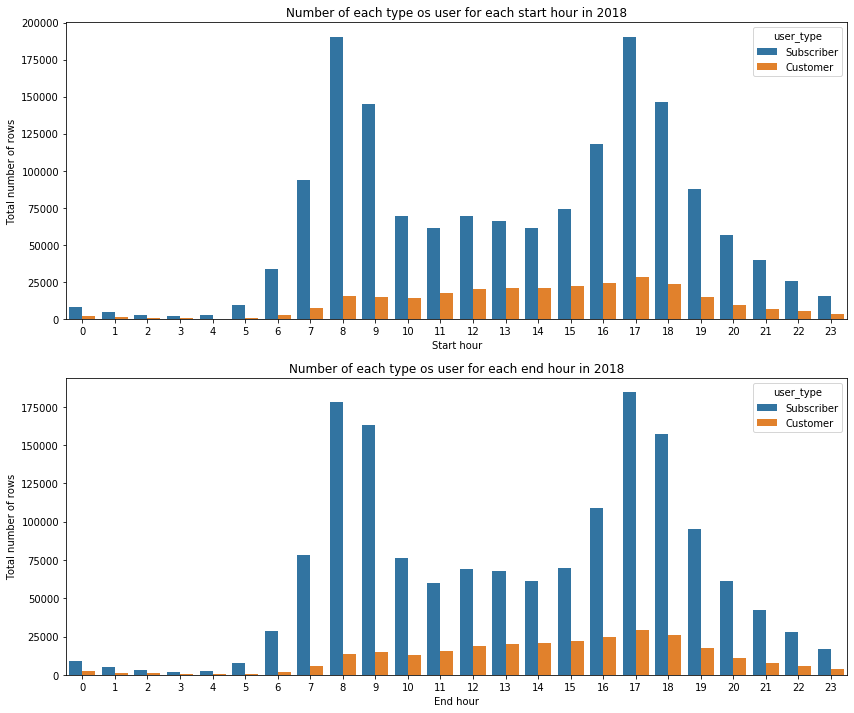

In [40]:
# Plot a countplot using the library Seaborn
fig, ax = plt.subplots(nrows=2, figsize = [14,12])
sns.countplot(data = bike_data.query('start_year == 2018'), x = 'start_hour', hue = 'user_type', ax = ax[0]);
sns.countplot(data = bike_data.query('start_year == 2018'), x = 'end_hour', hue = 'user_type', ax = ax[1]);
ax[0].set_xlabel('Start hour');
ax[0].set_ylabel('Total number of rows');
ax[0].set_title('Number of each type os user for each start hour in 2018');
ax[1].set_xlabel('End hour');
ax[1].set_ylabel('Total number of rows');
ax[1].set_title('Number of each type os user for each end hour in 2018');
plt.show()

In this case, as we saw before, there is a high demand at 8-9 am and then at 5 - 6 pm. Basically when the people start and end of the work. If we look on the subscribers and customers, we can see that there are more customers using it at the afternoon compared on the moorning.

In [41]:
# List with the top 10 start stations
list_top10_start_stations = bike_data.query('start_year == 2018').start_station_id.value_counts()[0:10].reset_index()['index']

Once I have the list I can plot the amount of rides for each month of the top 10 stations in 2018.

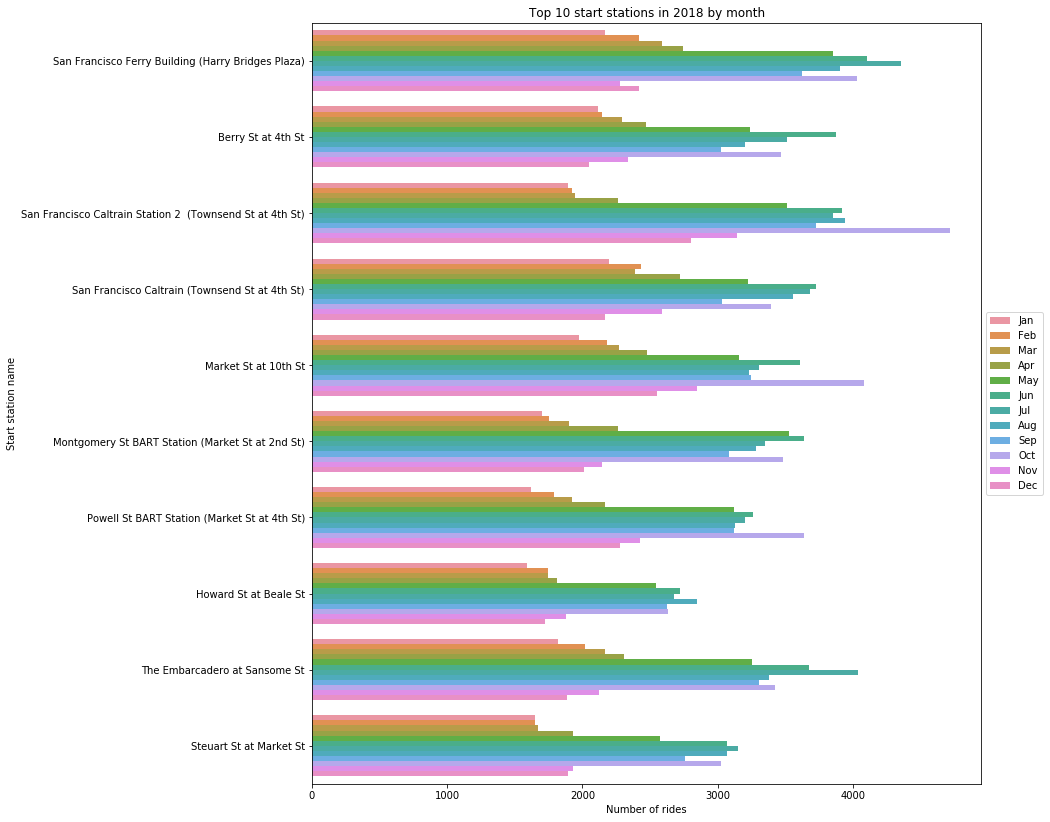

In [42]:
plt.figure(figsize=(12,14));
sns.countplot(data=bike_data.query('(start_year == 2018) and (start_station_id in @list_top10_start_stations)'), y='start_station_name',\
              hue='start_month_name');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
plt.title('Top 10 start stations in 2018 by month');
plt.ylabel('Start station name');
plt.xlabel('Number of rides');

As I can see, the stations have more rides in summer

In [43]:
# Count the number of start rides in each station in 2018 for each type of customer
df = bike_data.query('start_year == 2018').groupby(['start_station_id', 'user_type'])['bike_id'].count().reset_index()

# Pivote the dataframe to put each type of user in a column
df = df.pivot(index='start_station_id',columns='user_type').reset_index()

# Calculate the stations in where the amount of customers is higher than the subscribers
df['more_customers'] = df.bike_id.Customer > df.bike_id.Subscriber

# Save the list with the stations id with more customers than subscribers
list_stations_more_customers = df[df.more_customers].start_station_id

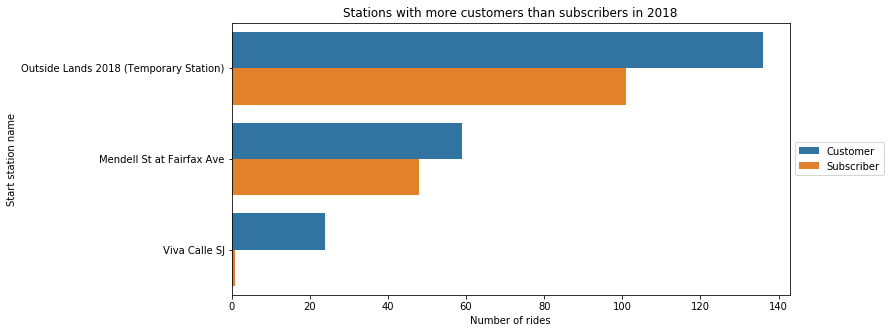

In [44]:
plt.figure(figsize=(10, 5));
sns.countplot(data=bike_data.query('(start_year == 2018) and (start_station_id in @list_stations_more_customers)'),\
              y='start_station_name', hue='user_type');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
plt.title('Stations with more customers than subscribers in 2018');
plt.ylabel('Start station name');
plt.xlabel('Number of rides');

In this case, we found that there are 3 stations in where the amount of users of type Customer is higher compared to the Subscribers. In this stations, it would interessting for the company to generate more promotions to try to get more Subscribers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In the case of the most popular stations, I saw that there are 2 stations (San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St) in where the amount of Customers is quite high compared to the Subscribers. I think in this stations could be interesstion to prompote more and try to increase the number of Subscribers in this stations.

Related to the main question, I found that in 2018 there are 3 stations in where the number of Customers is higher compared to the number of Subscribers. In this stations I think it can be a good oportunity for the company to increase the number of subscribers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The first thing I saw is that the amount of customers and subscribers increase during the summer and then it decrease on the winter. I also saw that during the day there is a high demand at 8-9 am and then at 5 - 6 pm. Basically when the people start and end of the work. And in the case of the customers, we can see that there are more customers using it at the afternoon compared on the moorning.

## Multivariate Exploration

Looking at the relationship between many features and user type.

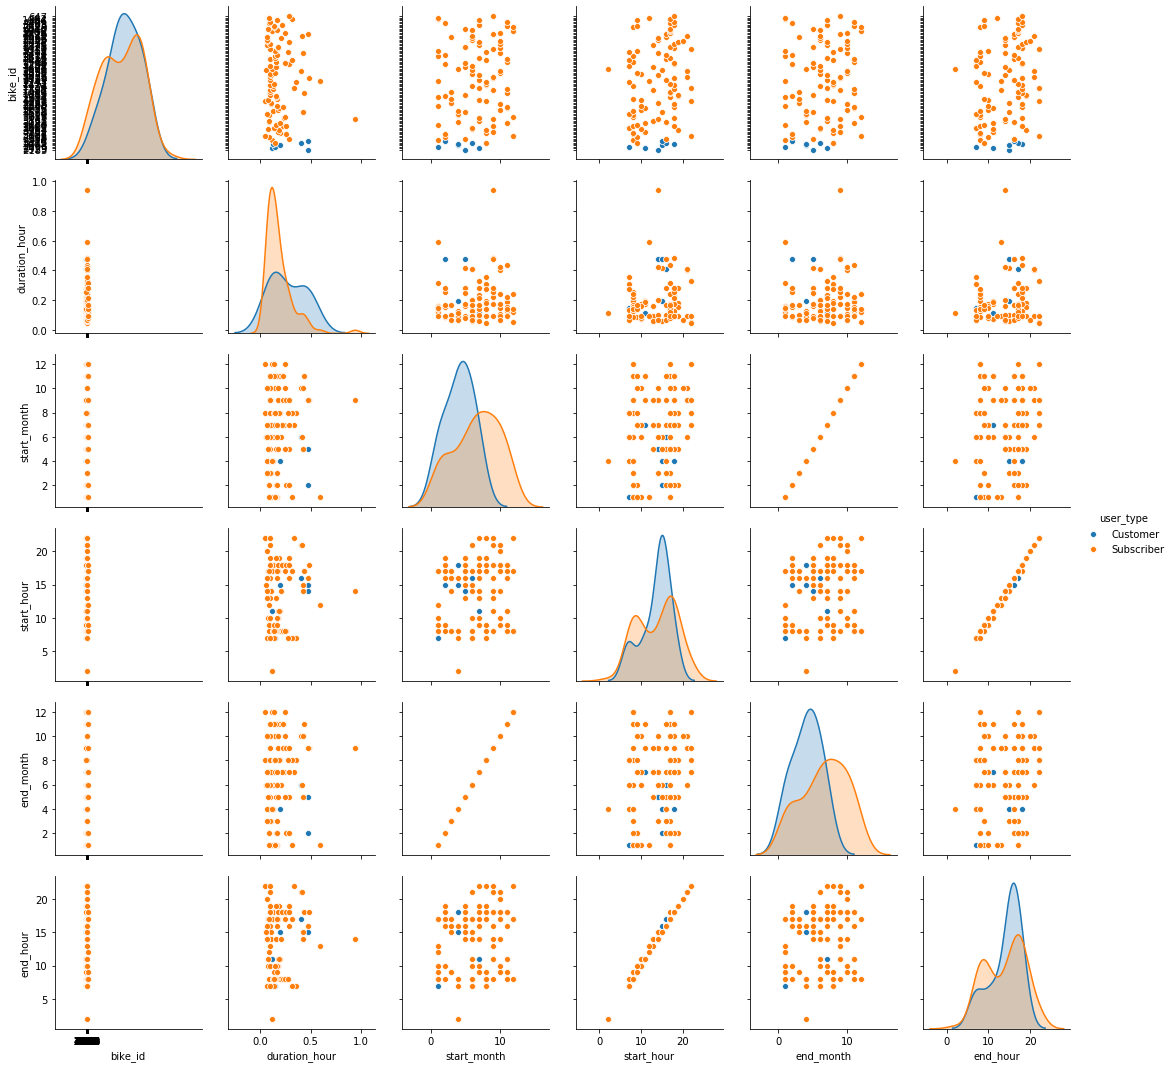

In [45]:
# To generate a plot with not a lot of problems in the performance we take a sample of 100 from the orignal dataframe
pairplot_df = bike_data.query('start_year == 2018')[['bike_id','duration_hour','start_month','start_hour', \
                                                     'end_month', 'end_hour', 'user_type']].sample(100)

sns.pairplot(pairplot_df, hue = 'user_type');

As we can see in general the data doesn't look really usefull for the purpose of this analysis. But in the previous plot we can see that the type of users Customer they usally use bikes with high ID. Another thing we can see, is a big increment in the number of users of the type Customer especially during the summer. For the rest of relations, we can't say something usefull.

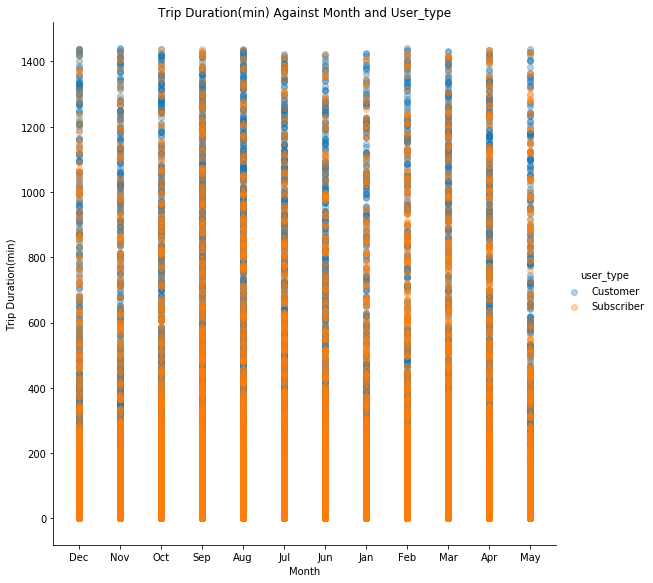

In [47]:
# Finding out how the average trip time is affected by user type and month.
g = sns.FacetGrid(data =  bike_data, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_month_name','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User_type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

Users who are subscriber have more trips on the whole than those who are customers. What is interesting is that customers have generally longer journey durations, while the subscriber minimum is strangely 200 mins in all the months.

**As can be seen users who are customers have longer journey times, except in september and april when one subscriber had the longest journey. Subscribers cyclists have been consistent throughout the years. Customers cycle for longer durations are pretty consistent throughout the year.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this case, I could see that the amount of users of type Customer are more often during the summer. In this case I would recommend to the company to have a strategy of marketing during these season to try to increase the number of Subscribers.

### Were there any interesting or surprising interactions between features?

In this case, I really found interessting the fact that most of the type of users Customer they have bikes with high bike_id. I also saw that there is a clear correlation between the start and end hour (due to most of the rides are less of 3 hours). We can also see that in the case of the users Subscribers there are two pics on the morning and at the afternoon and in the case of the Customers the pic it looks like it's on the afternoon only.